In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import IFrame
from jupyterthemes import jtplot

In [2]:
# jtplot.style(theme='monokai')

In [78]:
plt.style.use('default')
plt.rc('font',size=14)
plt.rc('figure',figsize=(8,6))
plt.rc('text', usetex=True)


lo que me pregunto es qué tan mal estaba el voumen. efectivamente los cambios de parametro de red son demasiado pequeños y estan pasando cosas raras.
Notar que hay cambios de pendiente para a = 1.005

In [42]:
!make datavol.dat

bash tkens.sh
ZrO2-new-00 60.12 43.657  -.55667443E+02 -.55667753E+02 -.55667880E+02 -.55667996E+02 -.55668392E+02  
unset vol=60.12
ZrO2-new-01 62.04 32.761  -.56094109E+02 -.56094426E+02 -.56094536E+02 -.56094685E+02 -.56094681E+02  
unset vol=62.04
ZrO2-new-02 64.00 23.895  -.56406923E+02 -.56407263E+02 -.56407358E+02 -.56407542E+02 -.56407542E+02  
unset vol=64.00
ZrO2-new-03 66.00 15.564  -.56623984E+02 -.56624284E+02 -.56624425E+02 -.56624598E+02 -.56624596E+02  
unset vol=66.00
ZrO2-new-04 68.04 8.557  -.56751131E+02 -.56751468E+02 -.56751562E+02 -.56751755E+02 -.56751756E+02  
unset vol=68.04
ZrO2-new-05 70.12 2.515  -.56798684E+02 -.56799052E+02 -.56799160E+02 -.56799361E+02 -.56799352E+02  
unset vol=70.12
ZrO2-new-06 72.25 -2.528  -.56776327E+02 -.56776549E+02 -.56776701E+02 -.56776968E+02 -.56777007E+02  
unset vol=72.25
ZrO2-new-07 74.41 -6.788  -.56690390E+02 -.56690756E+02 -.56690936E+02 -.56691185E+02 -.56691240E+02  
unset vol=74.41
ZrO2-new-08 76.62 -10.029  -.5655331

In [43]:
datavol = pd.read_csv('datavol.dat', sep='\s+')

In [35]:
datavol

,dir,Vol,Pressure,Evsk1,Evsk2,Evsk3,Evsk4,Evsk5
0,ZrO2-new-00,60.12,43.657,-55.667443,-55.667753,-55.667880,-55.667996,-55.668392
1,ZrO2-new-01,62.04,43.657,-56.094109,-56.094426,-56.094536,-56.094685,-56.094681
2,ZrO2-new-02,64.00,43.657,-56.406923,-56.407263,-56.407358,-56.407542,-56.407542
3,ZrO2-new-03,66.00,43.657,-56.623984,-56.624284,-56.624425,-56.624598,-56.624596
4,ZrO2-new-04,68.04,43.657,-56.751131,-56.751468,-56.751562,-56.751755,-56.751756
5,ZrO2-new-05,70.12,43.657,-56.798684,-56.799052,-56.799160,-56.799361,-56.799352
6,ZrO2-new-06,72.25,43.657,-56.776327,-56.776549,-56.776701,-56.776968,-56.777007
7,ZrO2-new-07,74.41,43.657,-56.690390,-56.690756,-56.690936,-56.691185,-56.691240
8,ZrO2-new-08,76.62,43.657,-56.553318,-56.551013,-56.551358,-56.551635,-56.551755
9,ZrO2-new-09,78.88,43.657,-56.364329,-56.361616,-56.361981,-56.362361,-56.362521


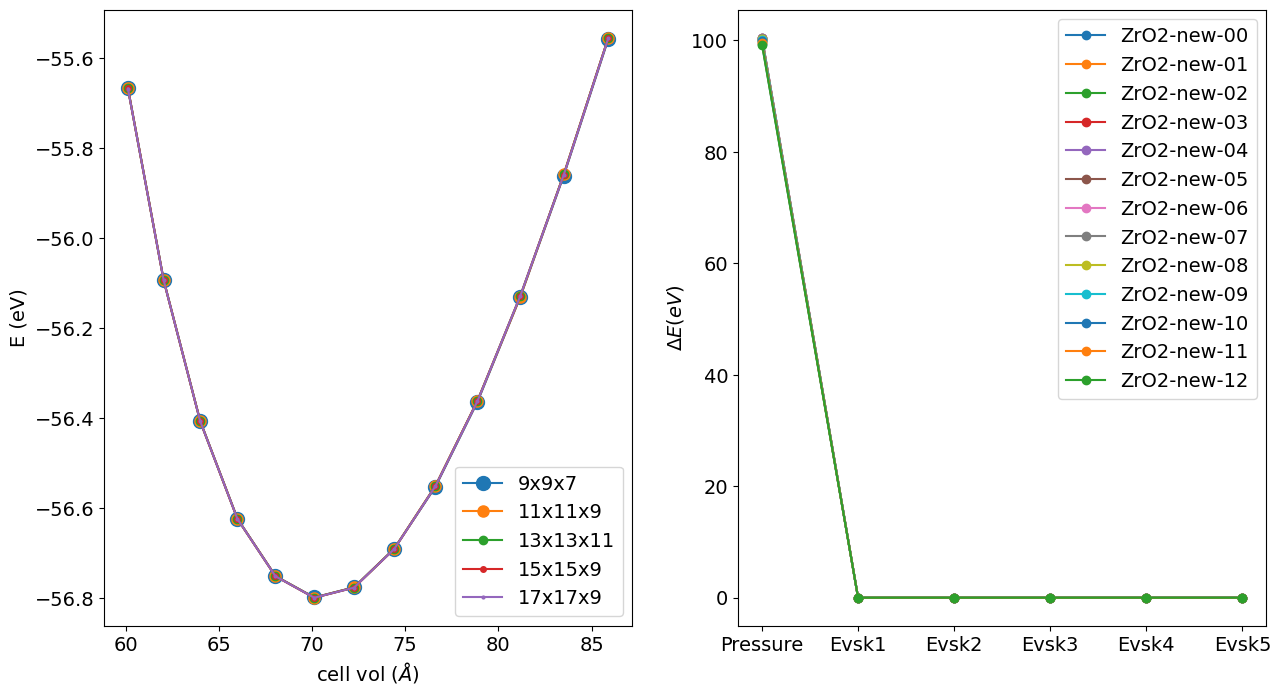

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(datavol['Vol'], datavol['Evsk1'],'-o', label='9x9x7', ms=10)
ax[0].plot(datavol['Vol'], datavol['Evsk2'],'-o', label='11x11x9',ms=8)
ax[0].plot(datavol['Vol'], datavol['Evsk3'],'-o', label='13x13x11', ms = 6)
ax[0].plot(datavol['Vol'], datavol['Evsk4'],'-o', label='15x15x9', ms=4)
ax[0].plot(datavol['Vol'], datavol['Evsk5'],'-o', label='17x17x9', ms=2)
ax[0].legend()
for i in datavol.index:
    ax[1].plot(datavol.loc[i][2:]-datavol.loc[i][-1],'-o',label=datavol.loc[i][0])
ax[1].legend()
ax[0].set_xlabel(r'cell vol ($\AA$)')
ax[0].set_ylabel('E (eV)')
ax[1].set_ylabel(r'$\Delta E (eV)$')
plt.savefig('datavol.pdf')

In [44]:
from pymatgen.analysis.eos import BirchMurnaghan

In [45]:
BMZO = BirchMurnaghan(datavol['Vol'],datavol['Evsk5'])

In [46]:
BMZO.fit()

In [52]:
Vs = np.linspace(datavol['Vol'].min(), datavol['Vol'].max(),100)

In [86]:
datavol['Vol']/BMZO.v0

0     0.853187
1     0.880434
2     0.908249
3     0.936632
4     0.965582
5     0.995101
6     1.025328
7     1.055982
8     1.087345
9     1.119417
10    1.151916
11    1.185123
12    1.219041
Name: Vol, dtype: float64

Text(0.5, 1.0, '$V_0 = 70.47$ \\AA $^3$')

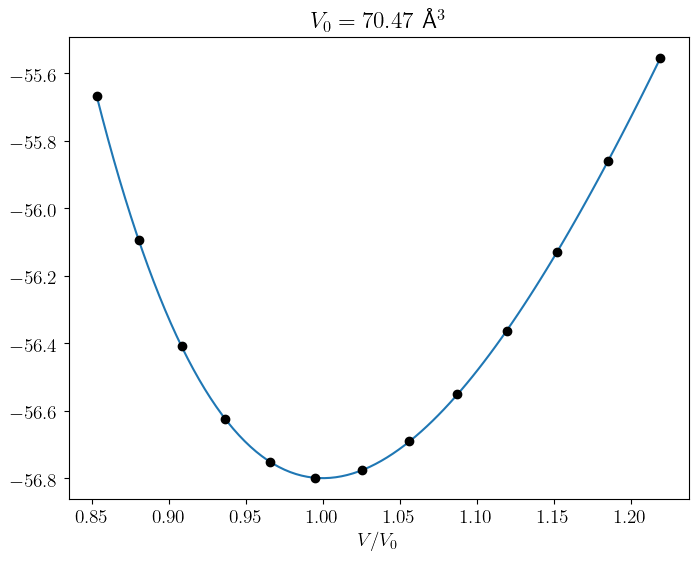

In [94]:
plt.plot(Vs/BMZO.v0, BMZO.func(Vs), label='EOS fit')
plt.plot(datavol['Vol']/BMZO.v0, datavol['Evsk5'],'ok',label='DFT results')
plt.xlabel(r'$V/V_0$')
plt.title('$V_0 = {:.2f}$ \\AA $^3$'.format(BMZO.v0))

In [74]:
eVtoPa = BMZO.b0_GPa/BMZO.b0
def PBM(V, constants):
    B0 = constants['b0']*eVtoPa
    B1 = constants['b1']
    E0 = constants['e0']
    V0 = constants['v0']  
    return (3/2)*B0* ( 
        (V0/V)**(7/3)-(V0/V)**(5/3)
    )*(
    1 + 0.75*(B1-4)*((V0/V)**(2/3)-1)
    )

In [81]:
Ps = PBM(Vs, BMZO.results)

Text(0, 0.5, 'P(GPa)')

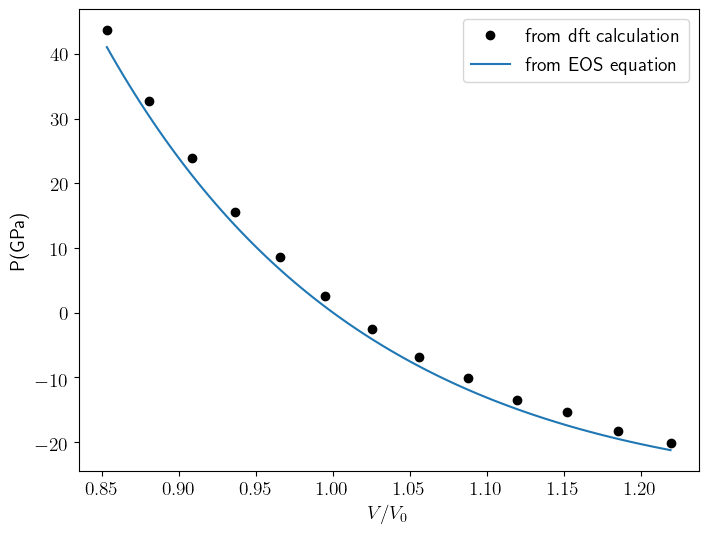

In [90]:
plt.plot(datavol['Vol']/BMZO.v0,datavol['Pressure'],'ok',label='from dft calculation')
plt.plot(Vs/BMZO.v0, Ps, label='from EOS equation')
plt.legend()
plt.xlabel(r'$V/V_0$')
plt.ylabel(r'P(GPa)')

In [8]:
# vopt = datavol['Vol'][datavol['evsk4'].dimin()]
vopt=datavol['Vol'][datavol['Evsk4'].idxmin()]
#print('El volumen de minima energía es: {}'.format(vopt))

El volumen de minima energía es {{vopt}}

# Estructura de bandas con calculo bueno

In [9]:
!make more_useful_data.txt

bash get_all_sumo.sh
ZrO2-new-00

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=es_AR.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz (306D4),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 1402607 bytes (1370 KiB)

Extracting archive: vasprun.7z
--
Path = vasprun.7z
Type = 7z
Physical Size = 1402607
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

     26% - vasprun.x                Everything is Ok

Size:       32209745
Compressed: 1402607
Indirect band gap: 3.807 eV
Direct band gap: 4.138 eV
  Up:
    k-point: [0.02, 0.00, 0.00]
    k-point indices: 28
    Band indices: 24, 25
  Down:
    k-point: [0.06, 0.00, 0.00]
    k-point indices: 30
    Band indices: 24, 25

Valence band maximum:
  Energy: 4.600 eV
  k-point: [0.50, 0.50, 0.10]
  k-point location: between A-M
  k-point indices: 181
  Band indices: 23, 24(Up)

Conduction band minimum:
  Energy: 8.407 eV
  k

ZrO2-new-04

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=es_AR.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz (306D4),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 1379197 bytes (1347 KiB)

Extracting archive: vasprun.7z
--
Path = vasprun.7z
Type = 7z
Physical Size = 1379197
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

    Everything is Ok

Size:       32209745
Compressed: 1379197
Indirect band gap: 3.890 eV
Direct band gap: 3.985 eV
  Up:
    k-point: [0.00, 0.00, 0.00]
    k-point indices: 26, 27, 105, 106, 107, 108
    Band indices: 23, 25
  Down:
    k-point: [0.02, 0.00, 0.00]
    k-point indices: 28
    Band indices: 23, 25

Valence band maximum:
  Energy: 3.172 eV
  k-point: [0.50, 0.50, 0.50]
  k-point location: A
  k-point indices: 159, 160, 161, 162
  Band indices: 23, 24(Up)

Conduction band minimum:
  Energy: 7.062 eV
  k-point: [0.00, 0.00, 0.0

Indirect band gap: 3.479 eV
Direct band gap: 3.688 eV
  Up:
    k-point: [0.00, 0.00, 0.00]
    k-point indices: 26, 27, 105, 106, 107, 108
    Band indices: 24, 25
  Down:
    k-point: [0.02, 0.00, 0.00]
    k-point indices: 28
    Band indices: 24, 25

Valence band maximum:
  Energy: 2.083 eV
  k-point: [0.27, 0.27, 0.00]
  k-point location: between M-\Gamma
  k-point indices: 92
  Band indices: 24(Up)

Conduction band minimum:
  Energy: 5.561 eV
  k-point: [0.00, 0.00, 0.00]
  k-point location: \Gamma
  k-point indices: 26, 27, 105, 106, 107, 108
  Band indices: 25(Up)

Using parabolic fitting of the band edges

Hole effective masses:
  m_h: -3.086 | band 24 (up) | [0.27, 0.27, 0.00] -> [0.00, 0.00, 0.00] (\Gamma)
  m_h: -1.487 | band 24 (up) | [0.27, 0.27, 0.00] -> [0.50, 0.50, 0.00] (M)

Electron effective masses:
  m_e: 0.625 | band 25 (up) | [0.00, 0.00, 0.00] (\Gamma) -> [0.50, 0.00, 0.00] (X)
  m_e: 0.659 | band 25 (up) | [0.00, 0.00, 0.00] (\Gamma) -> [0.50, 0.50, 0.00] (M)
 

In [18]:
IFrame('more_useful_data.txt',width=600, height=800)

In [21]:
databands = pd.read_csv('more_useful_data.txt',sep='#') 

In [22]:
databands

,Vol,mass,value,bandno,spin,from,fname,to,toname
0,60.12,m_h,-0.588,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
1,60.12,m_h,-0.605,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
2,60.12,m_h,-0.588,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
3,60.12,m_h,-0.605,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
4,60.12,m_e,0.557,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
5,60.12,m_e,1.946,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
6,60.12,m_e,0.557,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
7,60.12,m_e,16.797,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
8,62.04,m_h,-0.628,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
9,62.04,m_h,-0.646,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)


## masa del electron

In [26]:
m_e = databands[(databands['mass']=='m_e')]
m_e_gx_up = m_e[(m_e['toname']=='(X)') & (m_e['spin']=='(up)')]
m_e_gx_dn = m_e[(m_e['toname']=='(X)') & (m_e['spin']=='(down)')]
m_e_gz_up = m_e[(m_e['toname']=='(Z)') & (m_e['spin']=='(up)')]
m_e_gz_dn = m_e[(m_e['toname']=='(Z)') & (m_e['spin']=='(down)')]

In [29]:
# guardo las tablas a txts
with open('m_e.dat', 'w') as me:
    me.write('\n=====gamma->X up\n')
m_e_gx_up.to_csv('m_e.dat', sep=' ', index=False, header=True,mode='a')
with open('m_e.dat', 'a') as me:
    me.write('\n=====gamma->X down\n')
m_e_gx_dn.to_csv('m_e.dat', sep=' ', index=False, header=True,mode='a')
with open('m_e.dat', 'a') as me:
    me.write('\n=====gamma-Z Up\n')
m_e_gz_up.to_csv('m_e.dat', sep=' ', index=False, header=True,mode='a')
with open('m_e.dat', 'a') as me:
    me.write('\n=====gamma-Z Down\n')
m_e_gz_dn.to_csv('m_e.dat', sep=' ', index=False, header=True,mode='a')

### electron en el camino $\Gamma \rightarrow Z$, spin down

In [30]:
m_e_gz_dn

,Vol,mass,value,bandno,spin,from,fname,to,toname
7,60.12,m_e,16.797,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
15,62.04,m_e,16.448,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
23,64.00,m_e,17.454,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
31,66.00,m_e,18.654,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
39,68.04,m_e,18.279,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
49,70.12,m_e,19.707,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
57,72.25,m_e,19.318,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
65,74.41,m_e,21.046,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
73,76.62,m_e,20.639,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
81,78.88,m_e,22.775,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)


### spin up

In [31]:
m_e_gz_up

,Vol,mass,value,bandno,spin,from,fname,to,toname
5,60.12,m_e,1.946,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
13,62.04,m_e,2.013,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
21,64.00,m_e,2.057,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
29,66.00,m_e,2.129,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
37,68.04,m_e,2.200,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
47,70.12,m_e,2.265,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
55,72.25,m_e,2.356,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
63,74.41,m_e,2.441,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
71,76.62,m_e,2.490,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)
79,78.88,m_e,2.595,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.00, 0.00, 0.50]",(Z)


notar que en este camino la masa para espin down es 10 veces mayor que con spin down.

## electron camino $\Gamma \rightarrow X$

### spin up

In [32]:
m_e_gx_up

,Vol,mass,value,bandno,spin,from,fname,to,toname
4,60.12,m_e,0.557,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
12,62.04,m_e,0.578,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
20,64.00,m_e,0.592,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
28,66.00,m_e,0.609,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
36,68.04,m_e,0.620,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
46,70.12,m_e,0.629,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
54,72.25,m_e,0.630,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
62,74.41,m_e,0.635,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
70,76.62,m_e,0.623,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
78,78.88,m_e,0.625,25,(up),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)


### spin down

In [33]:
m_e_gx_dn

,Vol,mass,value,bandno,spin,from,fname,to,toname
6,60.12,m_e,0.557,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
14,62.04,m_e,0.578,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
22,64.00,m_e,0.592,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
30,66.00,m_e,0.609,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
38,68.04,m_e,0.620,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
48,70.12,m_e,0.629,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
56,72.25,m_e,0.630,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
64,74.41,m_e,0.635,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
72,76.62,m_e,0.623,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)
80,78.88,m_e,0.625,25,(down),"[0.00, 0.00, 0.00]",(gamma),"[0.50, 0.00, 0.00]",(X)


En este camino, ambas masas (up y down) son iguales.

### gráficos para electron

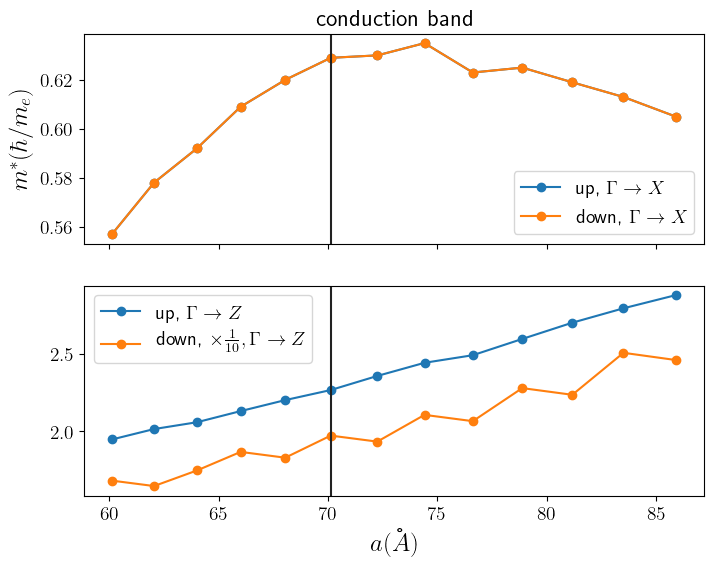

In [43]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].set_title('conduction band')
ax[0].plot(m_e_gx_up['Vol'], m_e_gx_up['value'],'-o', label=r'up, $ \Gamma \rightarrow X$')
ax[0].plot(m_e_gx_dn['Vol'], m_e_gx_dn['value'],'-o', label=r'down, $ \Gamma \rightarrow X$')
#ax[0].plot(m_e_gz['Vol'], m_e_gz['value'],'-o', label=r'$ \Gamma \rightarrow Z$')
ax[1].plot(m_e_gz_up['Vol'], m_e_gz_up['value'],'-o', label=r'up, $ \Gamma \rightarrow Z$')
ax[1].plot(m_e_gz_dn['Vol'], m_e_gz_dn['value']/10,'-o', label=r'down, $\times \frac{1}{10}, \Gamma \rightarrow Z$')
ax[1].set_xlabel(r'$a(\AA)$', fontsize=18)
ax[0].axvline(vopt,c='k')
ax[1].axvline(vopt,c='k')
ax[0].set_ylabel( r'$m^* (\hbar / m_e)$', fontsize=18)
ax[0].legend()
ax[1].legend()
plt.savefig('mases_at_conduction_band.pdf')

# masas del hueco

la masa del hueco tiene un comportamiento mas raro. para empezar, esta desdoblada en dos bandas segun la direccion. 

In [29]:
m_h = databands[(databands['mass']=='m_h')]
# m_h = databands[(databands['fname']=='(gamma)') & (databands['toname']=='(X)') & (databands['spin']=='(up)')]

In [45]:
m_h_za = databands[(databands['mass']=='m_h') & (databands['toname']=='(A)')]
m_h_zr = databands[(databands['mass']=='m_h') & (databands['toname']=='(R)')]
m_h_tz = databands[(databands['mass']=='m_h') & (databands['toname']=='(Z)')]
m_h_fz = databands[(databands['mass']=='m_h') & (databands['fname']==' (Z)')]

In [52]:
# guardo las tablas
with open('m_h.dat','w') as mh:
    mh.write( '\n===== m_h, Z->A\n')
m_h_za.to_csv('m_h.dat', sep=' ', mode='a', header=True, index=False)
with open('m_h.dat','a') as mh:
    mh.write('\n===== m_h, Z->R\n')
m_h_zr.to_csv('m_h.dat', sep=' ', mode='a', header=True, index=False)
with open('m_h.dat','a') as mh:
    mh.write('\n===== m_h, A->Z\n')
m_h_tz.to_csv('m_h.dat', sep=' ', mode='a', header=True, index=False)
with open('m_h.dat','a') as mh:
    mh.write('\n===== m_h, 03X->Z\n')
m_h_fz.to_csv('m_h.dat', sep=' ', mode='a', header=True, index=False)

In [32]:
m_h

,Vol,mass,value,bandno,spin,from,fname,to,toname
0,60.12,m_h,-0.588,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
1,60.12,m_h,-0.605,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
2,60.12,m_h,-0.588,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
3,60.12,m_h,-0.605,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
8,62.04,m_h,-0.628,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
9,62.04,m_h,-0.646,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
10,62.04,m_h,-0.628,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
11,62.04,m_h,-0.646,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
16,64.00,m_h,-0.715,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
17,64.00,m_h,-0.733,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)


## Hueco en el camino $Z \rightarrow A$

In [31]:
m_h_za

,Vol,mass,value,bandno,spin,from,fname,to,toname
42,70.12,m_h,-1.023,23,(up),"[0.00, 0.00, 0.50]",(Z),"[0.50, 0.50, 0.50]",(A)
45,70.12,m_h,-1.023,24,(up),"[0.00, 0.00, 0.50]",(Z),"[0.50, 0.50, 0.50]",(A)


### En el camino $A \rightarrow R$

In [327]:
m_h_zr

,Vol,mass,value,bandno,spin,from,fname,to,toname
0,60.12,m_h,-0.588,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
2,60.12,m_h,-0.588,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
8,62.04,m_h,-0.628,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
10,62.04,m_h,-0.628,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
16,64.00,m_h,-0.715,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
18,64.00,m_h,-0.715,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
24,66.00,m_h,-0.786,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
26,66.00,m_h,-0.786,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
32,68.04,m_h,-0.899,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)
34,68.04,m_h,-0.899,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.50, 0.50]",(R)


In [328]:
m_h_tz

,Vol,mass,value,bandno,spin,from,fname,to,toname
1,60.12,m_h,-0.605,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
3,60.12,m_h,-0.605,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
9,62.04,m_h,-0.646,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
11,62.04,m_h,-0.646,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
17,64.00,m_h,-0.733,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
19,64.00,m_h,-0.733,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
25,66.00,m_h,-0.804,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
27,66.00,m_h,-0.804,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
33,68.04,m_h,-0.919,23,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)
35,68.04,m_h,-0.919,24,(up),"[0.50, 0.50, 0.50]",(A),"[0.00, 0.00, 0.50]",(Z)


In [331]:
m_h_fz

,Vol,mass,value,bandno,spin,from,fname,to,toname
40,70.12,m_h,-7.820,23,(up),"[0.00, 0.00, 0.50]",(Z),"[0.00, 0.00, 0.00]",(gamma)
41,70.12,m_h,-0.715,23,(up),"[0.00, 0.00, 0.50]",(Z),"[0.00, 0.50, 0.50]",(R)
42,70.12,m_h,-1.023,23,(up),"[0.00, 0.00, 0.50]",(Z),"[0.50, 0.50, 0.50]",(A)
43,70.12,m_h,-7.820,24,(up),"[0.00, 0.00, 0.50]",(Z),"[0.00, 0.00, 0.00]",(gamma)
44,70.12,m_h,-1.301,24,(up),"[0.00, 0.00, 0.50]",(Z),"[0.00, 0.50, 0.50]",(R)
45,70.12,m_h,-1.023,24,(up),"[0.00, 0.00, 0.50]",(Z),"[0.50, 0.50, 0.50]",(A)


todos los valores que puse ahi estan $v < v_{eq}$, que pasa arriva ?

In [53]:
m_h_vbig = databands[(databands['Vol']>vopt) & (databands['mass']=='m_h')]

In [335]:
m_h_vbig

,Vol,mass,value,bandno,spin,from,fname,to,toname
50,72.25,m_h,-4.311,24,(up),"[0.31, 0.00, 0.00]",NaN,"[0.00, 0.00, 0.00]",(gamma)
51,72.25,m_h,-6.054,24,(up),"[0.31, 0.00, 0.00]",NaN,"[0.50, 0.00, 0.00]",(X)
52,72.25,m_h,-4.311,24,(down),"[0.31, 0.00, 0.00]",NaN,"[0.00, 0.00, 0.00]",(gamma)
53,72.25,m_h,-6.054,24,(down),"[0.31, 0.00, 0.00]",NaN,"[0.50, 0.00, 0.00]",(X)
58,74.41,m_h,-5.110,24,(up),"[0.33, 0.00, 0.00]",NaN,"[0.00, 0.00, 0.00]",(gamma)
59,74.41,m_h,-4.245,24,(up),"[0.33, 0.00, 0.00]",NaN,"[0.50, 0.00, 0.00]",(X)
60,74.41,m_h,-5.110,24,(down),"[0.33, 0.00, 0.00]",NaN,"[0.00, 0.00, 0.00]",(gamma)
61,74.41,m_h,-4.245,24,(down),"[0.33, 0.00, 0.00]",NaN,"[0.50, 0.00, 0.00]",(X)
66,76.62,m_h,-4.696,24,(up),"[0.35, 0.00, 0.00]",NaN,"[0.00, 0.00, 0.00]",(gamma)
67,76.62,m_h,-2.826,24,(up),"[0.35, 0.00, 0.00]",NaN,"[0.50, 0.00, 0.00]",(X)


In [54]:
with  open('m_h.dat','a') as mh:
    mh.write('\n==== 0.3X ->G, ->X \n')
m_h_vbig.to_csv('m_h.dat',sep=' ', mode='a', header=True, index=False)

es curioso que para volumenes grandes, el máximo de la banda de valencia se corre de $Z$ a $[0.33, 0, 0 ]$ !

In [55]:
!make make_valenceband_wall.pdf

bash detail_bands_hole.sh > detail_bands_hole.dat
+ sed -i 's/gamma/\\Gamma/g' KPOINTS
+ unset -xv
detail_bands_hole.sh: línea 34: unset: -x: opción inválida
unset: uso: unset [-f] [-v] [-n] [name ...]
++ tar -xf OUT-OSZ-CON.tar.gz OUTCAR -O
++ grep volume
++ awk '{print $NF}'
++ tail -1
+ vol=60.12
+ sumo-bandplot -f vasprun.xml --prefix hole-60.12 --project Zr.d,O.p --ymin -1 --ymax 0.5 --band-edges
Label positions:
	0.0000: X
	0.9070: $\Gamma$
	1.5339: Z
	2.4409: R
	3.3480: A
	4.6307: Z
+ rm KPOINTS vasprun.xml
+ cd /home/mariano/CuadernoTrabajo/ZrO2/t-O2Zr/effmass_vs_vol
+ cat ZrO2-new-00/BANDSdir/sumo-bandstats.log
+ for dir in ZrO2-new-??
+ echo ''
+ echo ZrO2-new-01
+ banddir=ZrO2-new-01/BANDSdir
+ echo ZrO2-new-01/BANDSdir
+ cd ZrO2-new-01/BANDSdir
+ 7za x vasprun.7z -y
+ tar -xf inputs.tar.gz KPOINTS
+ set -xv
+ sed -i 's/gamma/\\Gamma/g' KPOINTS
+ unset -xv
detail_bands_hole.sh: línea 34: unset: -x: opción inválida
unset: uso: unset [-f] [-v] [-n] [name ...]
++ tar -xf OUT-OS

Label positions:
	0.0000: X
	0.8206: $\Gamma$
	1.3878: Z
	2.2085: R
	3.0291: A
	4.1897: Z
+ rm KPOINTS vasprun.xml
+ cd /home/mariano/CuadernoTrabajo/ZrO2/t-O2Zr/effmass_vs_vol
+ cat ZrO2-new-10/BANDSdir/sumo-bandstats.log
+ for dir in ZrO2-new-??
+ echo ''
+ echo ZrO2-new-11
+ banddir=ZrO2-new-11/BANDSdir
+ echo ZrO2-new-11/BANDSdir
+ cd ZrO2-new-11/BANDSdir
+ 7za x vasprun.7z -y
+ tar -xf inputs.tar.gz KPOINTS
+ set -xv
+ sed -i 's/gamma/\\Gamma/g' KPOINTS
+ unset -xv
detail_bands_hole.sh: línea 34: unset: -x: opción inválida
unset: uso: unset [-f] [-v] [-n] [name ...]
++ tar -xf OUT-OSZ-CON.tar.gz OUTCAR -O
++ tail -1
++ awk '{print $NF}'
++ grep volume
+ vol=83.51
+ sumo-bandplot -f vasprun.xml --prefix hole-83.51 --project Zr.d,O.p --ymin -1 --ymax 0.5 --band-edges
Label positions:
	0.0000: X
	0.8129: $\Gamma$
	1.3747: Z
	2.1876: R
	3.0005: A
	4.1502: Z
+ rm KPOINTS vasprun.xml
+ cd /home/mariano/CuadernoTrabajo/ZrO2/t-O2Zr/effmass_vs_vol
+ cat ZrO2-new-11/BANDSdir/sumo-bandstats.

<use ./ZrO2-new-01/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-06/BANDSdir/hole-bands-detail.pdf, id=10, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-06/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-05/BANDSdir/hole-bands-detail.pdf, id=12, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-05/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-04/BANDSdir/hole-bands-detail.pdf, id=14, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-04/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-09/BANDSdir/hole-bands-detail.pdf, id=16, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-09/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-08/BANDSdir/hole-bands-detail.pdf, id=18, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-08/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-07/BANDSdir/hole-bands-detail.pdf, id=20, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-07/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-12/BANDSdir/hole-bands-detail.pdf, id=22, 521.04837pt x 383.94316pt
> <use ./ZrO2-new-12/BANDSdir/hole-bands-detail.pdf>
<./ZrO2-new-11/BAN

In [57]:
IFrame('make_valenceband_wall.pdf',width=800, height=300)
